Exploração dos dados do dataset "DEMO_PHQ.csv"

In [10]:
import numpy as np
import pandas as pd
import missingno as msno

# Oculta warnings do notebook
import warnings
warnings.filterwarnings('ignore')

# Configurações para facilitar a visualização dos dataframes
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Carregando dados demográficos e do PHQ
dataset_path = '../data/raw/'
demo_phq_dataset_name = 'DEMO_PHQ.csv'

demo_phq = pd.read_csv(f"{dataset_path}{demo_phq_dataset_name}", sep=',')

In [3]:
# Visualizando informações basicas do dataset
print("demo_phq.shape: ", {demo_phq.shape})

print("\ndemo_phq.info():")
print(demo_phq.info())

demo_phq.shape:  {(5334, 15)}

demo_phq.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB
None


<AxesSubplot: >

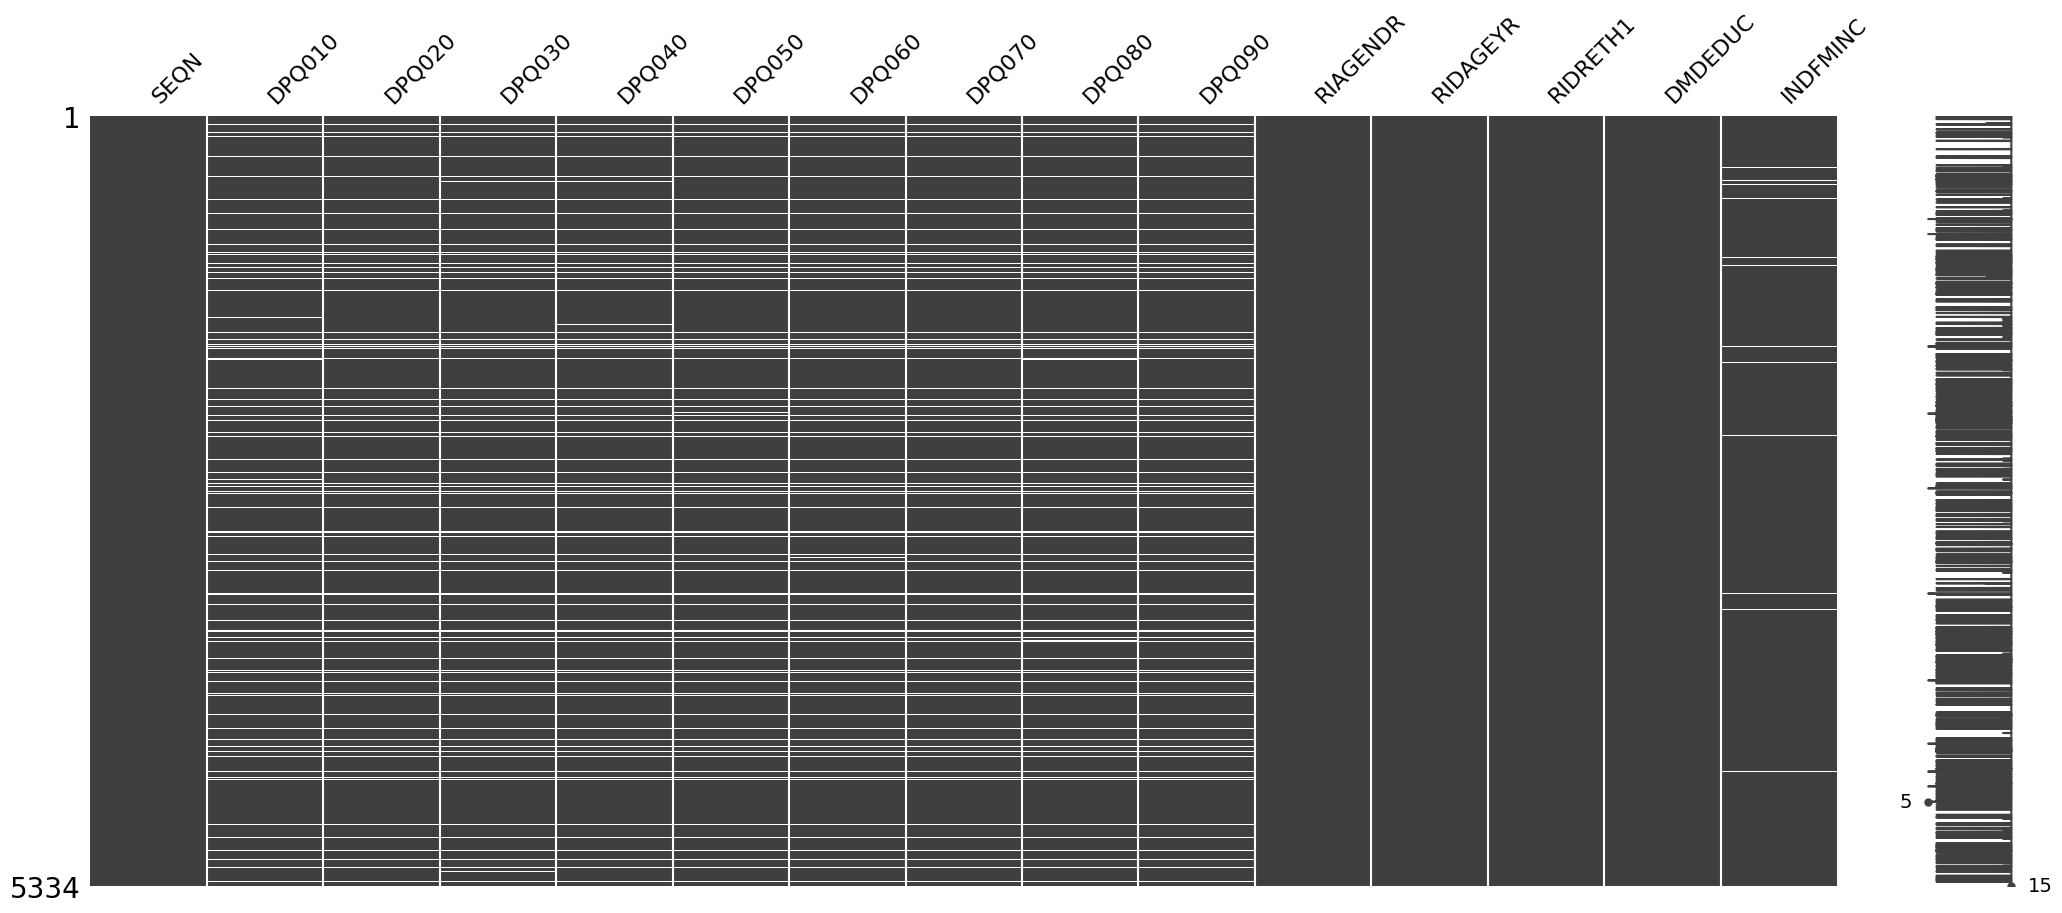

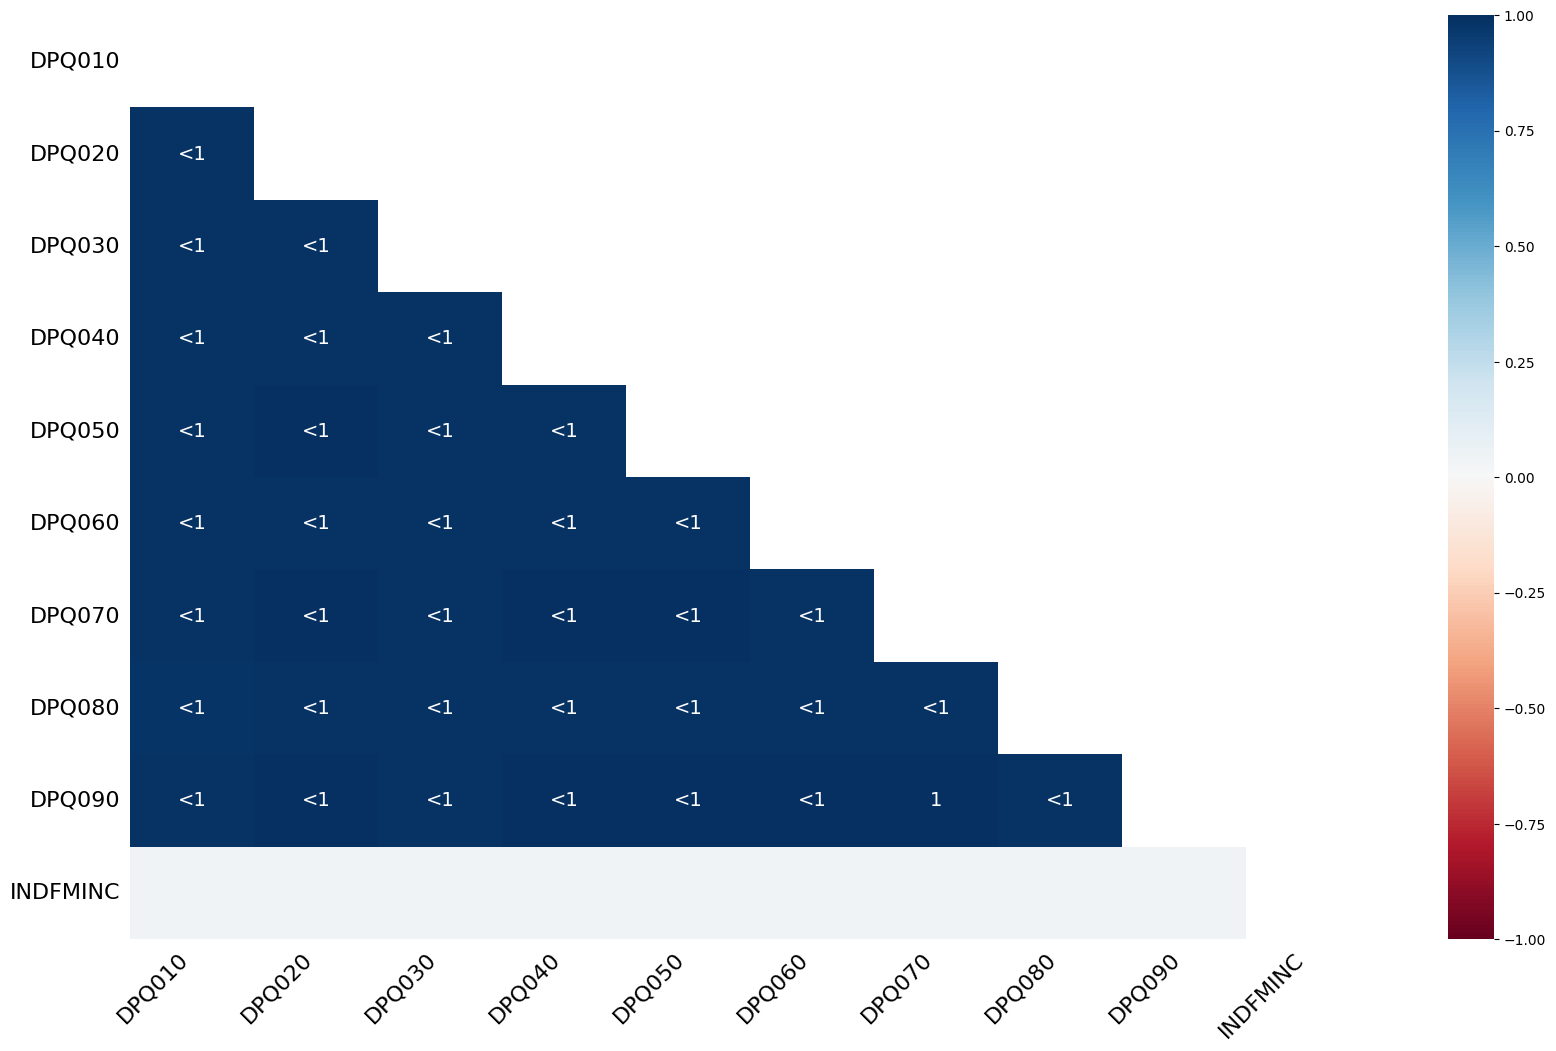

In [35]:
# Verificando ocorrência de valores ausentes
msno.matrix(demo_phq)
msno.heatmap(demo_phq)

In [5]:
# Visualizando estatísticas das respostas do PHQ
phq_cols = [
    "DPQ010", "DPQ020", "DPQ030", "DPQ040", "DPQ050", 
    "DPQ060", "DPQ070", "DPQ080", "DPQ090", 
]

demo_phq[phq_cols].describe()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
count,"4,836.00","4,836.00","4,836.00","4,836.00","4,836.00","4,836.00","4,836.00","4,836.00","4,836.00"
mean,0.31,0.31,0.55,0.72,0.32,0.21,0.23,0.15,0.05
std,0.76,0.71,0.93,0.91,0.74,0.62,0.64,0.59,0.33
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00


In [6]:
# Checando ocorrencias de respostas 7 e 9 no PHQ-9
print(f'Ocorrências de resposta 7: {(demo_phq[phq_cols] == 7.0).sum().sum()}')
print(f'Ocorrências de resposta 9: {(demo_phq[phq_cols] == 9.0).sum().sum()}')

Ocorrências de resposta 7: 0
Ocorrências de resposta 9: 50


In [33]:
# Como estes valores significam uma ausencia de resposta, eles serão removidos para não influenciar nos cálculos
demo_phq[phq_cols] = demo_phq[phq_cols].replace([7.0, 9.0], np.nan)

In [15]:
print(demo_phq[phq_cols].sum(axis=1).info())
print(demo_phq[phq_cols].sum(axis=1, skipna=False).info())

<class 'pandas.core.series.Series'>
RangeIndex: 5334 entries, 0 to 5333
Series name: None
Non-Null Count  Dtype  
--------------  -----  
5334 non-null   float64
dtypes: float64(1)
memory usage: 41.8 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 5334 entries, 0 to 5333
Series name: None
Non-Null Count  Dtype  
--------------  -----  
4836 non-null   float64
dtypes: float64(1)
memory usage: 41.8 KB
None


In [37]:
df = demo_phq
df[phq_cols].isna().sum()

DPQ010    507
DPQ020    503
DPQ030    505
DPQ040    503
DPQ050    502
DPQ060    503
DPQ070    502
DPQ080    507
DPQ090    500
dtype: int64

In [36]:
# Buscando forma de filtrar as linhas com todos DPQ == NaN
# https://thispointer.com/pandas-select-rows-with-nan-in-column/
df[df['DPQ010'].isna() & df['DPQ020'].notna()]

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
1395,33959,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,81,3,2,2.00
1686,34531,NaN,0.00,3.00,3.00,3.00,0.00,0.00,NaN,0.00,1,81,3,1,4.00
2231,35522,NaN,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,2,85,3,4,3.00
2518,36074,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,70,2,5,8.00
3639,38245,NaN,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,2,21,3,3,6.00
3767,38500,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,65,4,2,11.00
5092,41008,NaN,3.00,NaN,3.00,3.00,3.00,NaN,1.00,2.00,2,40,3,4,1.00
5114,41040,NaN,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,2,85,3,2,5.00


In [ ]:

def check_phq_nans(row):
    pass 

df['nans'] = df['PHQ9'].map(get_phq9_group)

In [62]:
empty_dpq_rows = df.loc[:,"DPQ010":"DPQ090"].isna().all(1)[s == True]
empty_dpq_rows = empty_dpq_rows[empty_dpq_rows == True]
empty_dpq_rows


0       True
14      True
20      True
21      True
58      True
        ... 
5280    True
5281    True
5285    True
5294    True
5302    True
Length: 498, dtype: bool

In [54]:
df.iloc[58]

SEQN       31,249.00
DPQ010           NaN
DPQ020           NaN
DPQ030           NaN
DPQ040           NaN
DPQ050           NaN
DPQ060           NaN
DPQ070           NaN
DPQ080           NaN
DPQ090           NaN
RIAGENDR        2.00
RIDAGEYR       18.00
RIDRETH1        1.00
DMDEDUC         3.00
INDFMINC        2.00
Name: 58, dtype: float64